### Summary

Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

However, MT employs a wide range of different genres, varying from one organization to the next.

The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. Ideally, these findings could contribute to a more informed application of MT or simply provide interesting sights about the mind.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
df=pd.read_csv('results.csv')

In [3]:
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [4]:
df.shape

(736, 33)

In [5]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [6]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [8]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [9]:
df.tail()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.
735,11/9/2022 1:55:20,29.0,YouTube Music,2.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Rarely,2.0,2.0,2.0,5.0,Improve,I understand.


### Removing outliers

In [11]:
age_index = df[(df['Age'] > 70)].index
df = df.drop(age_index, axis=0)

In [12]:
hpd_index = df[df['Hours per day'] >= 15].index
df= df.drop(hpd_index, axis=0)

In [13]:
data_index = df[df['BPM'] > 200].index
df = df.drop(data_index, axis=0)

### Checking for null values

In [14]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

### Replacing the null values

In [15]:
df.fillna(0,inplace=True ) # it will replace null values with zero

In [16]:
df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [17]:
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,0,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,0,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


### dropping unwanted columns

In [18]:
df.drop(['Timestamp'],axis=1,inplace=True)

In [19]:
df.drop(['Permissions'],axis=1,inplace=True)

### Checking for correlation

In [21]:
corr_data = df.corr()['Age']
corr_data.sort_values()

Anxiety         -0.150091
OCD             -0.127265
Hours per day   -0.097507
Depression      -0.085391
BPM             -0.084797
Insomnia         0.040985
Age              1.000000
Name: Age, dtype: float64

<AxesSubplot:>

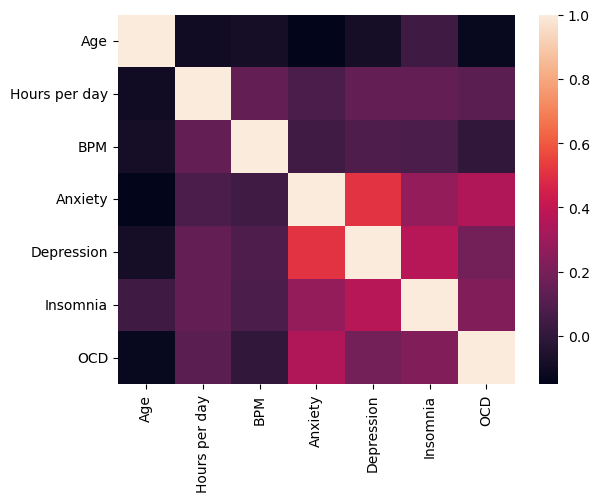

In [22]:
sns.heatmap(df.corr())

### Data Visualization

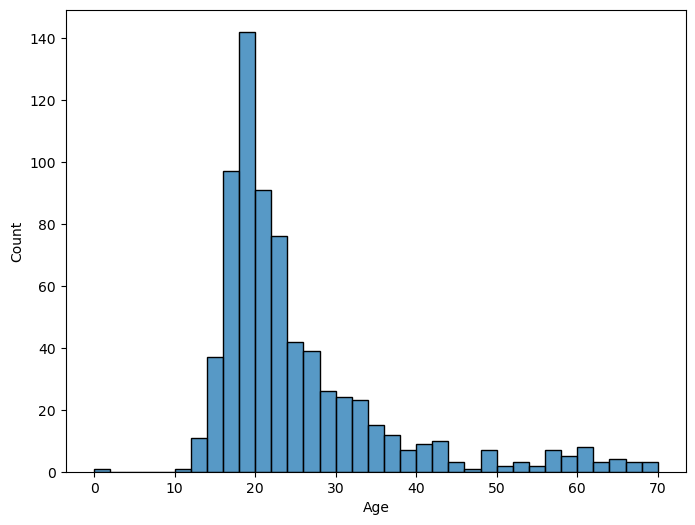

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'])
plt.show()

#### People of age 16 - 24 are more frequently listening music.

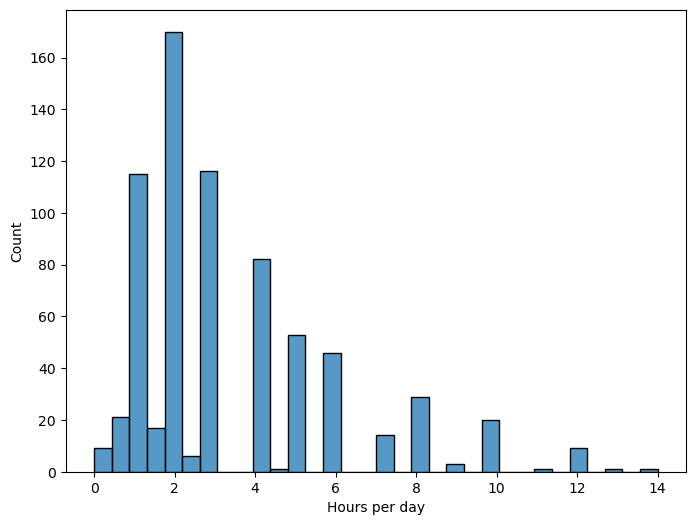

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(df['Hours per day'])
plt.show()

#### People working for 1-3 hours tend to hear music more than working more hours.

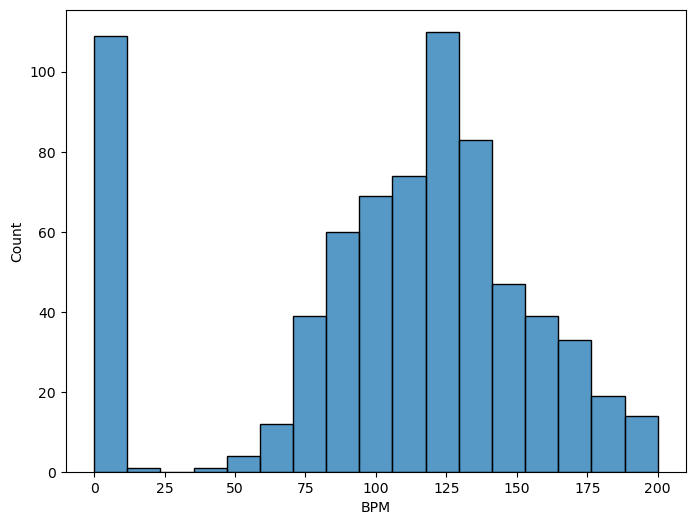

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(df['BPM'])
plt.show()

#### Most songs heard between the range of 100-125 BPM.

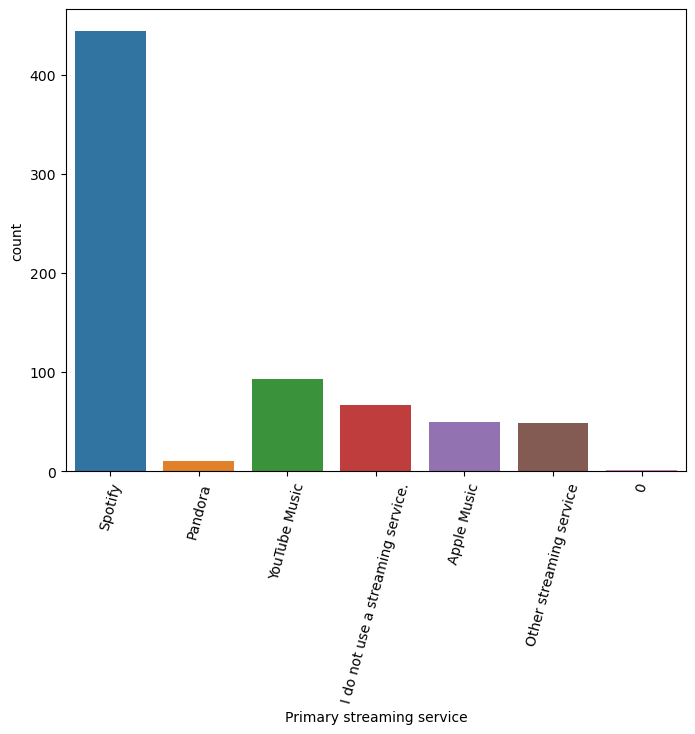

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Primary streaming service'])
plt.xticks(rotation=75)
plt.show()

#### This clearly shows Spotify is the most used streaming service.

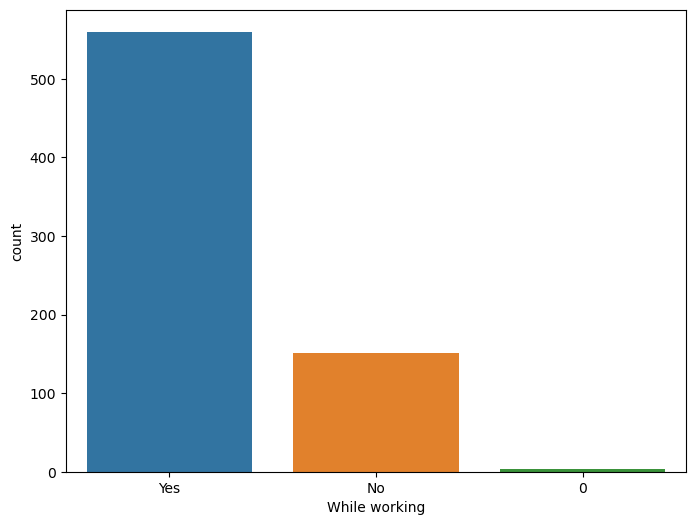

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['While working'])
plt.show()

#### Around 80% people like to hear music while working.

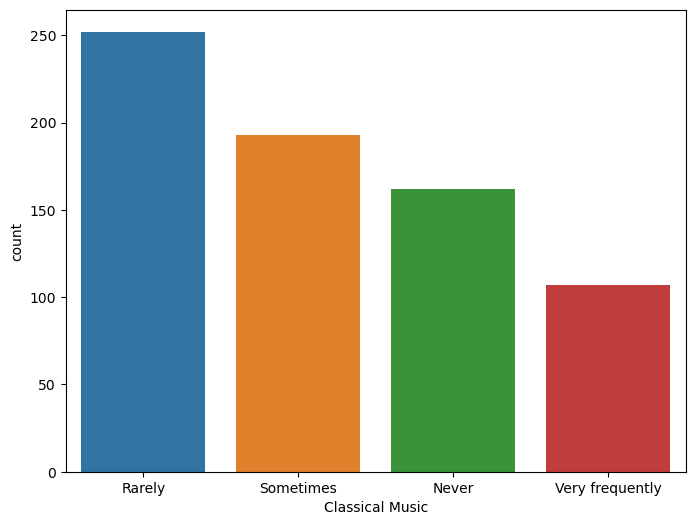

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency [Classical]'])
plt.xlabel('Classical Music')
plt.show()

35% people very rarely listen Classical music.

22% people never listen classical music whereas 15% listen very frequently.

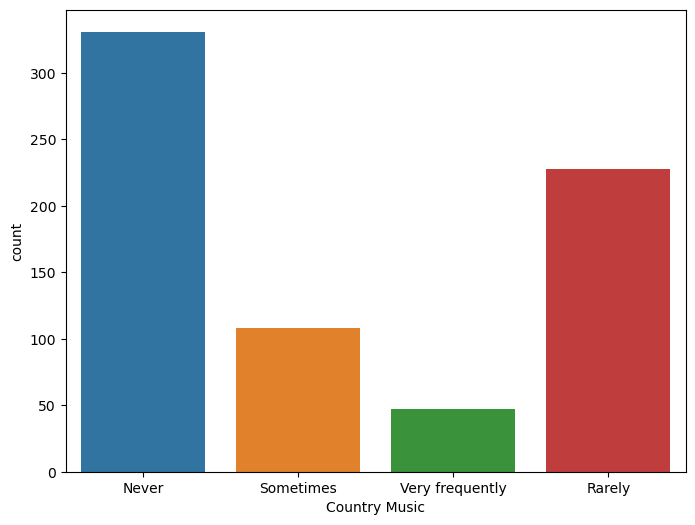

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency [Country]'])
plt.xlabel('Country Music')
plt.show()

50% people nevel listen country music.

7% people listen is very frequently and 36% listen rarely.

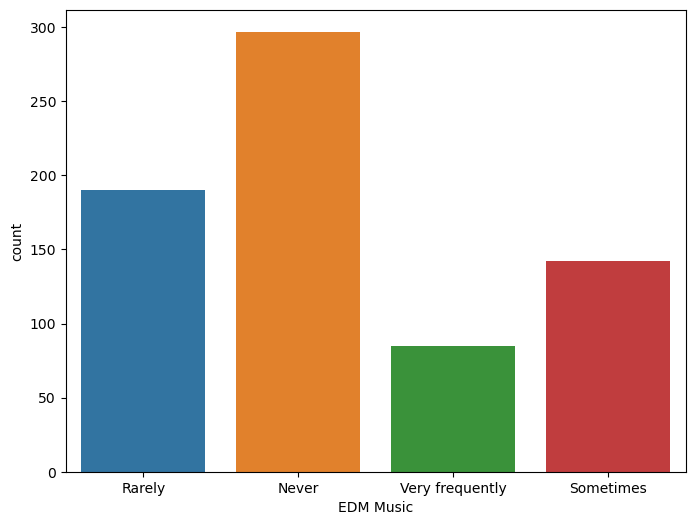

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency [EDM]'])
plt.xlabel('EDM Music')
plt.show()

42% people never listen EDM music and 11% are very frequent with this music.

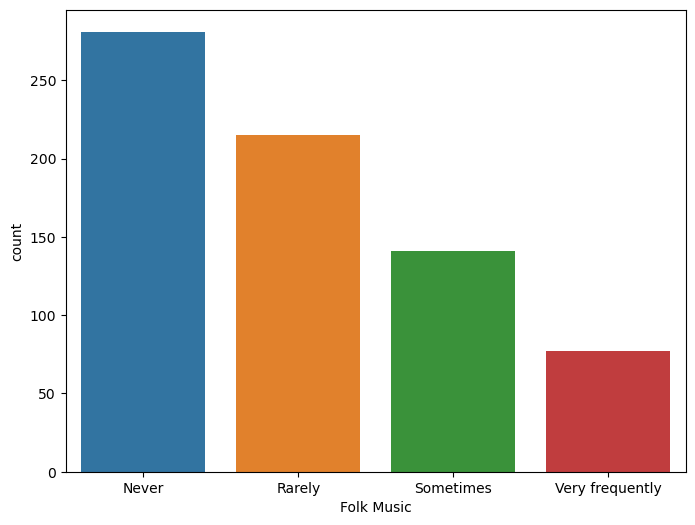

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency [Folk]'])
plt.xlabel('Folk Music')
plt.show()

#### 39% people never listen folk music and 10% are very frequently hear this music.

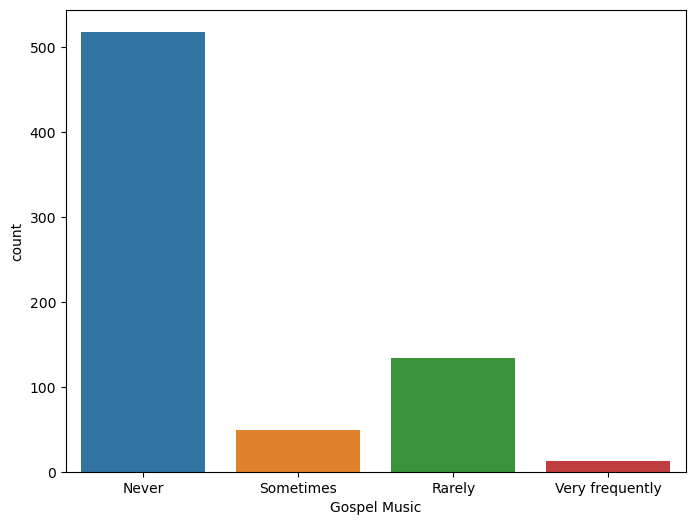

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency [Gospel]'])
plt.xlabel('Gospel Music')
plt.show()

Gospel music is very unpopular between listeners almost 75% people not hear it.

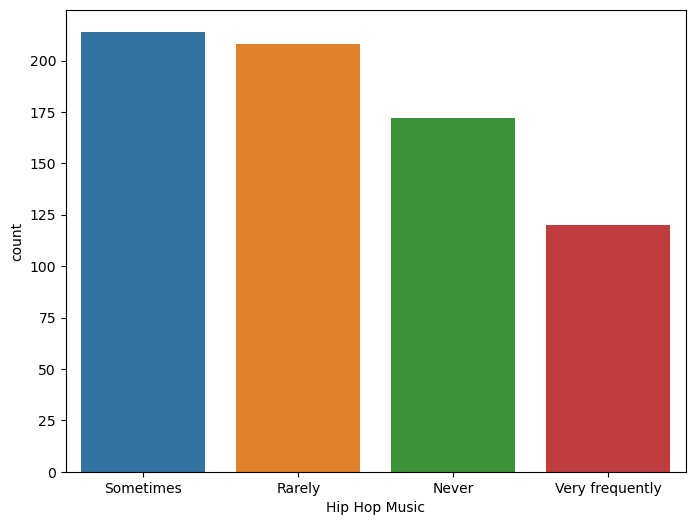

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency [Hip hop]'])
plt.xlabel('Hip Hop Music')
plt.show()

Hip hop is quite heared music type. Although 23% people don't listen this but other than that eveyone hear it.

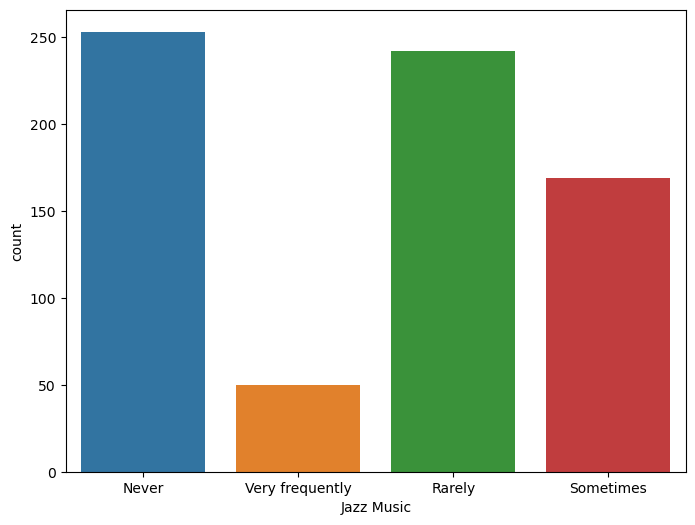

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency [Jazz]'])
plt.xlabel('Jazz Music')
plt.show()

#### Jazz music is also very unheard music genres nowadays. Because 35% never hear this and 33% hear it rarely.

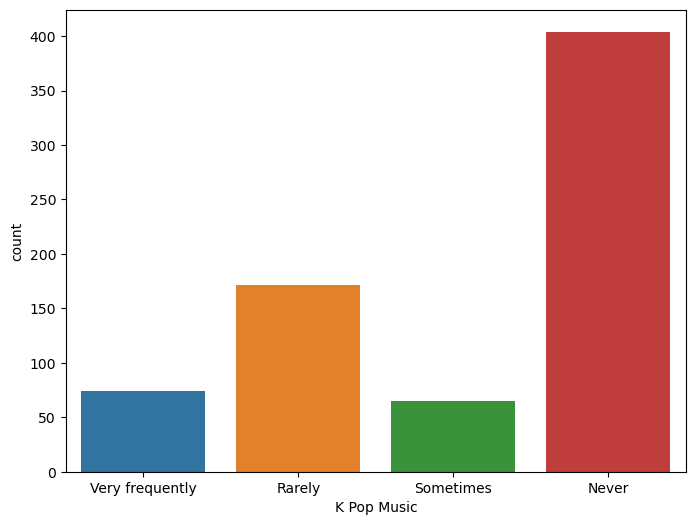

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency [K pop]'])
plt.xlabel('K Pop Music')
plt.show()

This is also one of less heard music. 56% never hear this music.

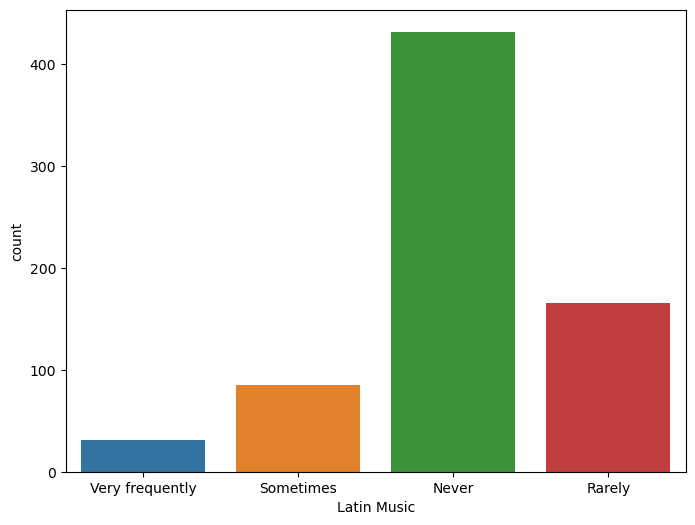

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency [Latin]'])
plt.xlabel('Latin Music')
plt.show()

60% people never hear this music also.

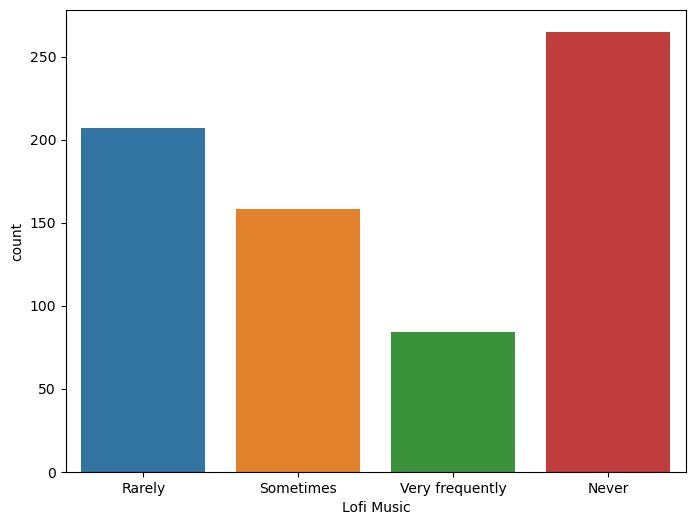

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency [Lofi]'])
plt.xlabel('Lofi Music')
plt.show()

Never heard by 36% and 32% hear it more than rarely.

### Bivariate Analysis

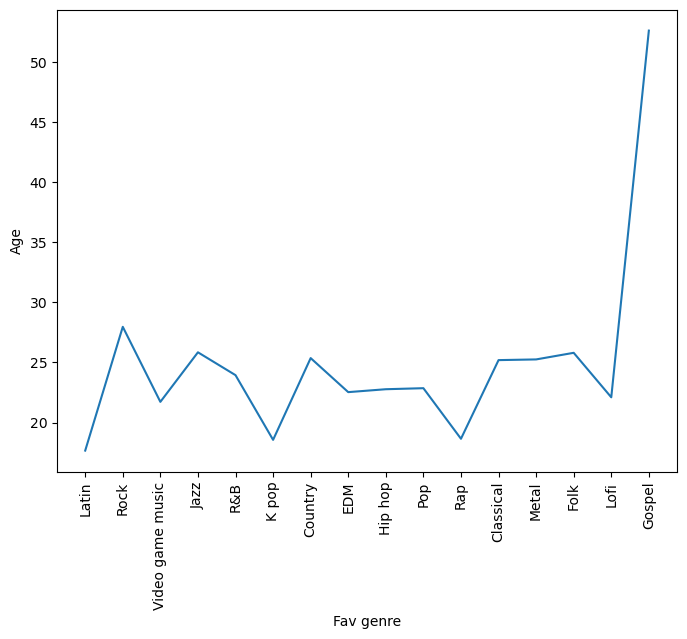

In [49]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df['Fav genre'], y=df['Age'], ci=None)
plt.xticks(rotation=90)
plt.show()

People around age of 20 are interested in Latin, K pop and Rap songs whereas Gospel is more famous in people around age of 50 and above.

Besides these above mentioned genre are heard by people from age of 20 to 30.

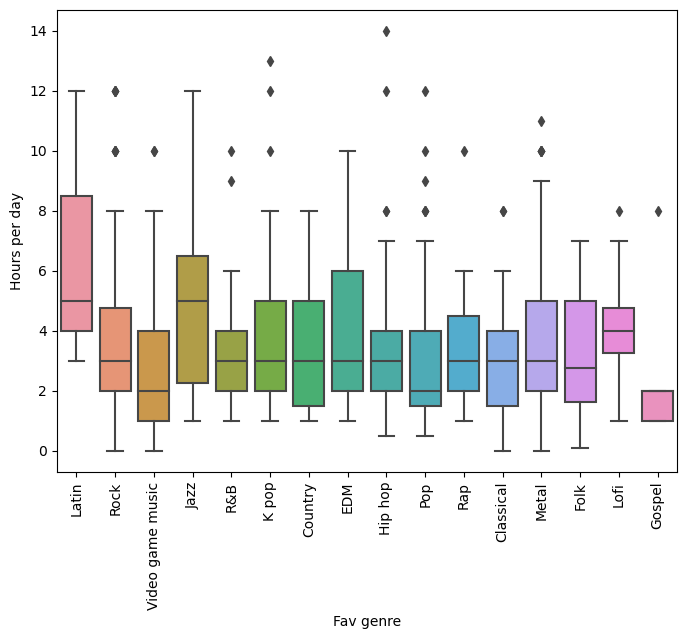

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Fav genre'], y=df['Hours per day'])
plt.xticks(rotation=90)
plt.show()

People work 12 hours a day use to listen Latin and Jazz genre music more.

People listening music of Gospel genre work less than others.

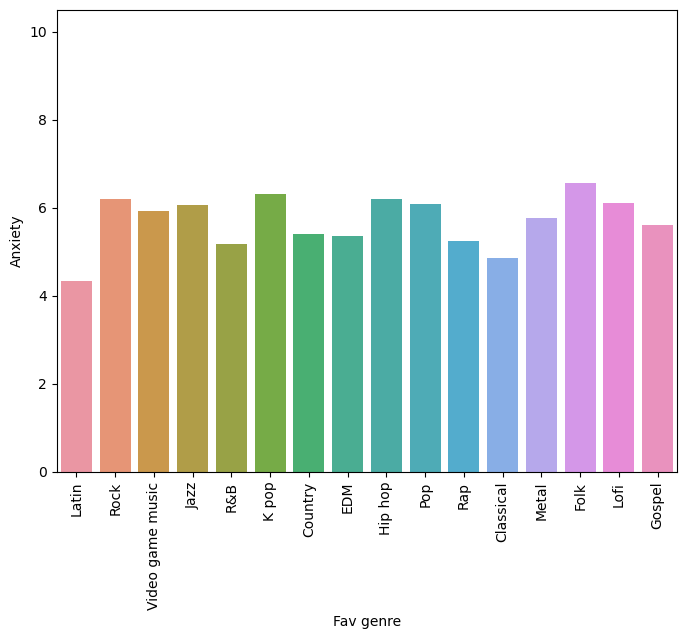

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Anxiety'], errwidth=0)
plt.xticks(rotation=90)
plt.show()

Every listener has Anxiety level above 4 but Rock, Jazz, K pop, Hip hop, Pop, and Folk music listeners have anxiety levey above 6.

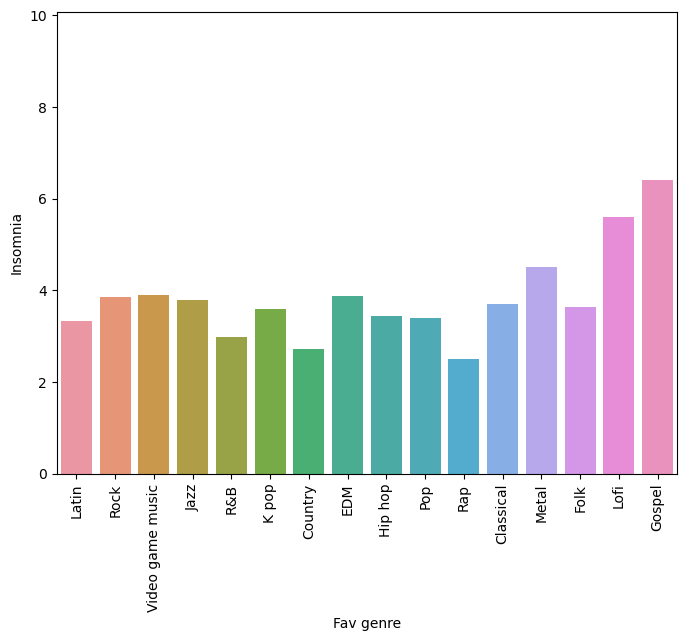

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Insomnia'], errwidth=0)
plt.xticks(rotation=90)
plt.show()

Every listener have insomnia level below 4 besides Metal, Lofi, and Gospel.

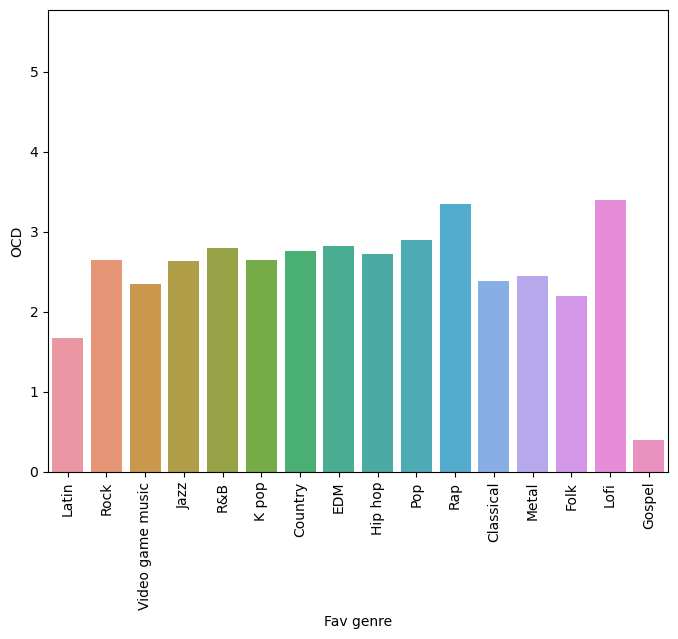

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['OCD'], errwidth=0)
plt.xticks(rotation=90)
plt.show()

The maximum OCD leve is above 3 in Rap and Lofi listeners.

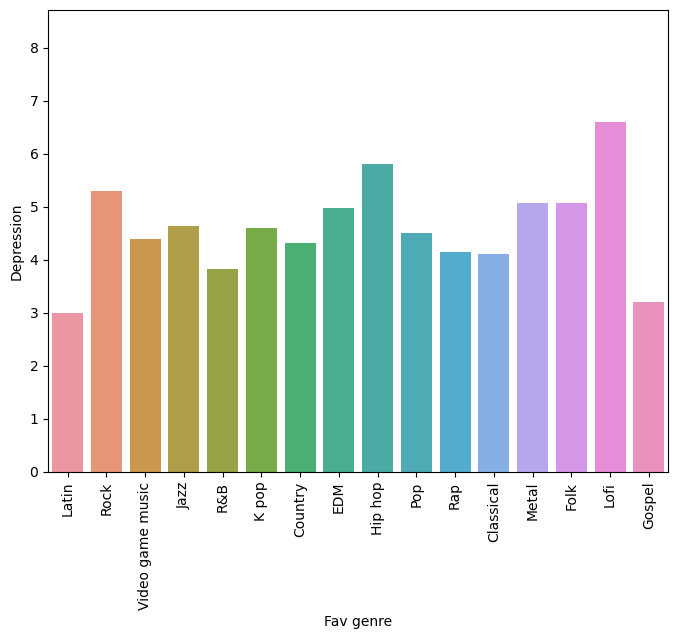

In [55]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Depression'], errwidth=0)
plt.xticks(rotation=90)
plt.show()

Evey listener have Depression level above 3.

Lofi, Hip hop, and Rock listeners have Depression level above 5.

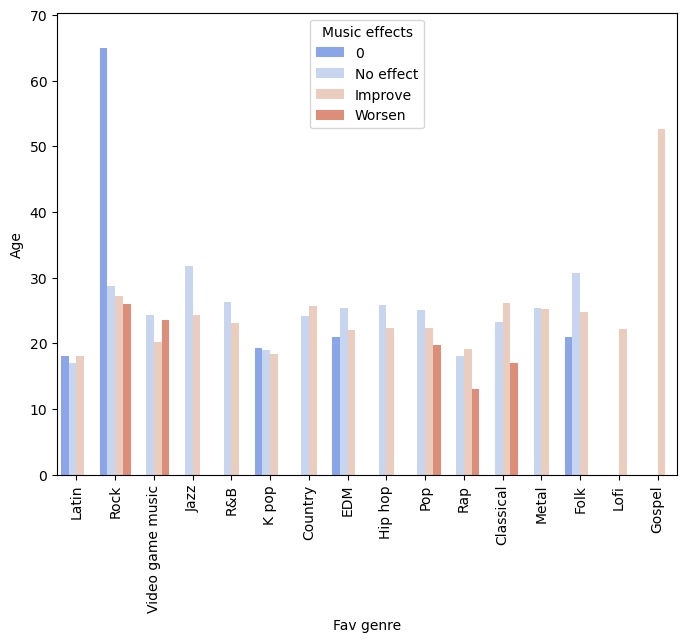

In [56]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Age'], hue=df['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Every Music listeners of every age showing some kind of improvement but Rock, Video Game Music, Pop, Rap, and Classical have worsen condition.

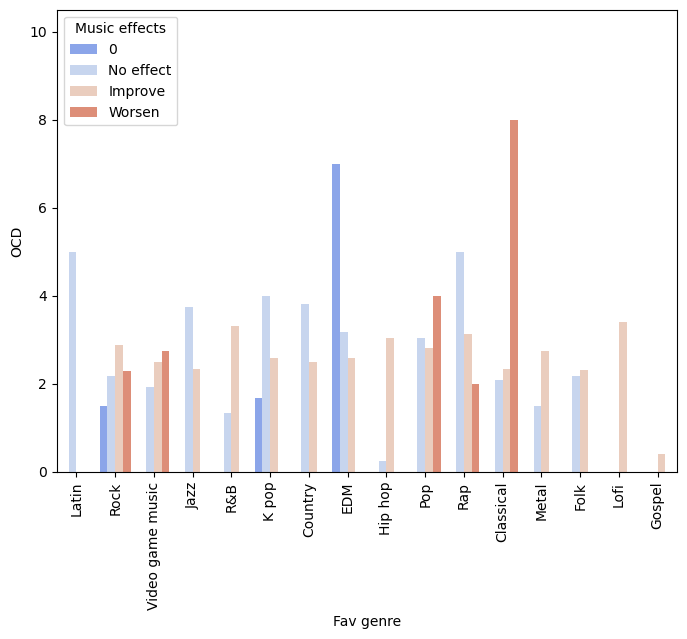

In [57]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['OCD'], hue=df['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Rock, Video Game Music, Pop, Rap, and Classical listeners have some level of OCD but Classical listeners have highest OCD.

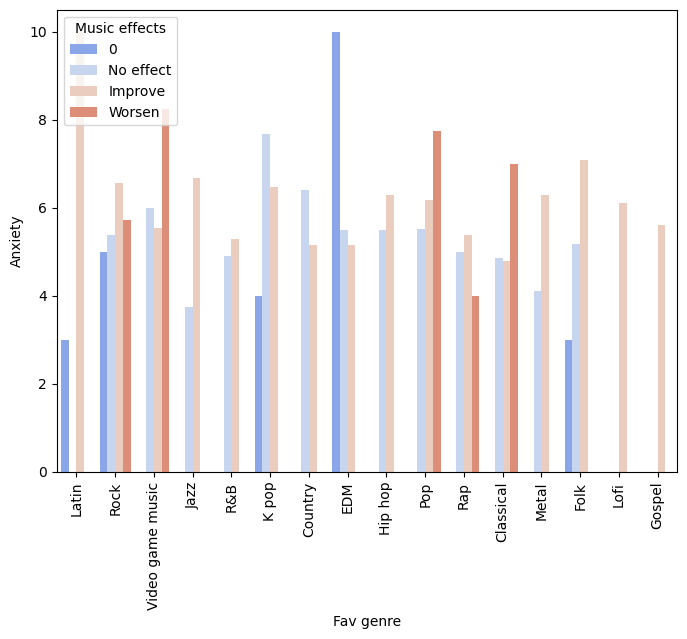

In [58]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Anxiety'], hue=df['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Rock, Video Game Music, Pop, Rap, and Classical listeners have some level of Anxiety but Video Game Music listeners have highest Anxiety.

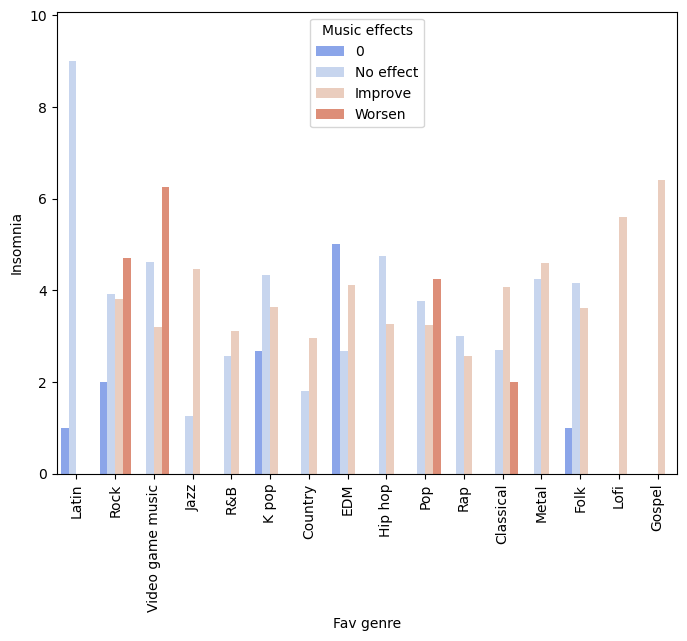

In [59]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Insomnia'], hue=df['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Rock, Video Game Music, Pop, and Classical listeners have some level of Insomnia but Video Game Music listeners have highest Anxiety.

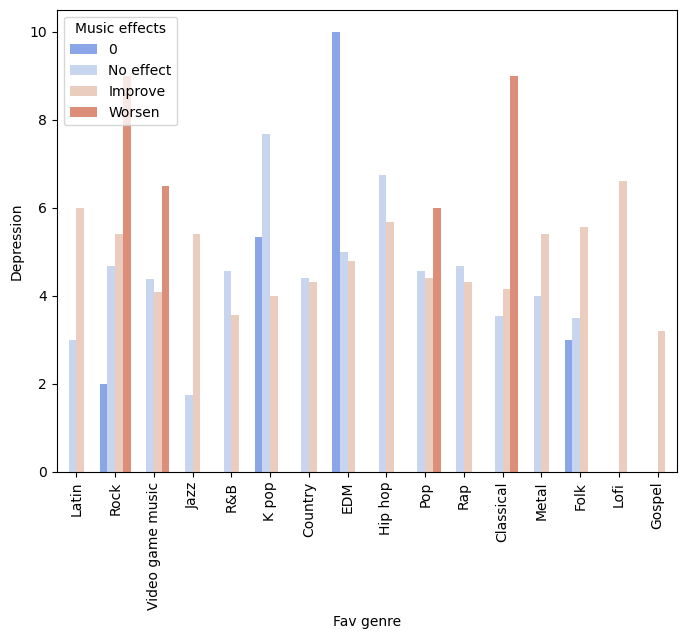

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Depression'], hue=df['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Rock, Video Game Music, Pop, and Classical listeners have high level of Depression.

### Conclusion

#### This shows us Music works in both ways. It helps in our mental condition but in some cases it worsen our situation too.